# Comparision of Crack Growth Model with Fatigue Crack Growth Test Data 

## Test Data

The fatigue crack growth data from the center cracked plate made of 7075-T6 Aluminum Alloy from the reference [1] is compared with the analytical crack growth model available. The comparisons and validation of models with respect to the test data will begin with analytical models based on the Paris crack growth model, and later will be extended to the comparisions with the results of AFGROW and Finite Element Analysis.

For a fatigue crack growth analysis, three tests were performed on the 12"(W) X 35"(H) X0.09"(T) ceter cracked plate specimens determine the properties below: 
1. tensile test for elastic properties
2. fatigue crack growth test for a crack growth rate model
3. residual static strength test for the critical stress intensity factor, Kc.

The table below showes the test data

In [11]:
import pandas as pd
import os
import numpy as np

current_dir = os.getcwd()
df = pd.read_csv(current_dir+r'\Hudson_DT_Test_USunit.csv', skiprows=4)

In [12]:
set(df['R'])

{0.0, 0.2, 0.33, 0.5, 0.67, 0.8}

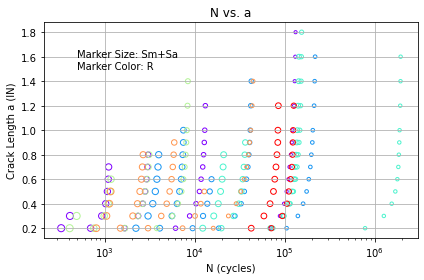

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

r_ratio = set(df['R'])
colors = cm.rainbow(np.linspace(0, 1, len(r_ratio)))

fig,ax = plt.subplots()
crack_length_a = list(map(float,list(df.columns[4:])))
for r,c in zip(r_ratio,colors):
    dfr = df[(df['R']==r)]
    for i in range(len(dfr)):
        ax.scatter(list(dfr.iloc[i][4:]),crack_length_a,s=dfr.iloc[i][0]+dfr.iloc[i][1],color=c,facecolors='none')
ax.semilogx()
ax.grid(True)

ax.set_xlabel('N (cycles)')
ax.set_ylabel('Crack Length a (IN)')
ax.set_title('N vs. a')
ax.text(500,1.5,'Marker Size: Sm+Sa\nMarker Color: R')

fig.tight_layout()

plt.show()

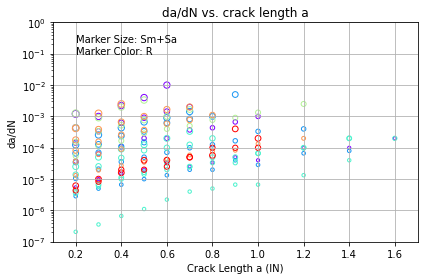

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = cm.rainbow(np.linspace(0, 1, len(r_ratio)))

fig,ax = plt.subplots()

da = np.diff(crack_length_a)
for r,c in zip(r_ratio,colors):
    dfr = df[(df['R']==r)]
    for i in range(len(dfr)):
        N = dfr.iloc[i][4:]
        dN = np.diff(N)
        dadN = da/dN
        ax.scatter(crack_length_a[:-1],dadN,s=dfr.iloc[i][0]+dfr.iloc[i][1],color=c,facecolors='none')

ax.semilogy()
ax.grid(True)

ax.set_xlim([0.1, 1.7])
ax.set_ylim([1.0e-7, 1.0])
ax.set_xlabel('Crack Length a (IN)')
ax.set_ylabel('da/dN')
ax.set_title('da/dN vs. crack length a')
ax.text(0.2,0.1,'Marker Size: Sm+Sa\nMarker Color: R')

fig.tight_layout()

plt.show()    

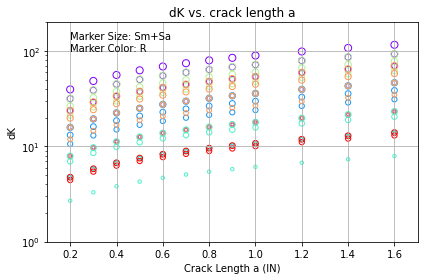

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def K_inc(dS,a,b):
    alpha = a/b
    F = (1.0-0.5*alpha+0.326*alpha**2)/np.sqrt(1-alpha)
    dK = F*dS*np.sqrt(np.pi*a)
    return dK

fig,ax = plt.subplots()

a = np.array(list(map(float,list(df.columns[4:]))))
b = 6.0
colors = cm.rainbow(np.linspace(0, 1, len(r_ratio)))

for r,c in zip(r_ratio,colors):
    dfr = df[(df['R']==r)]
    for i in range(len(dfr)):
        dS = 2.0*+dfr.iloc[i][1]
        dK = K_inc(dS,a,b)

        ax.scatter(a,dK,s=dfr.iloc[i][0]+dfr.iloc[i][1],color=c,facecolors='none')

ax.semilogy()
ax.grid(True)

ax.set_xlim([0.1, 1.7])
ax.set_ylim([1.0, 200])
ax.set_xlabel('Crack Length a (IN)')
ax.set_ylabel('dK')
ax.set_title('dK vs. crack length a')
ax.text(0.2,100,'Marker Size: Sm+Sa\nMarker Color: R')

fig.tight_layout()

plt.show()    
    

## Crack Growth Rate and Stress Intensity Range

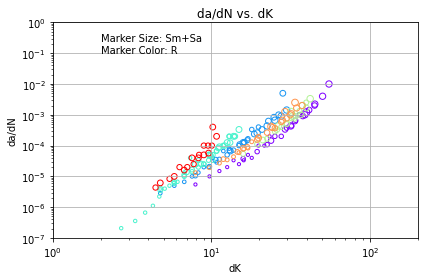

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def K_inc(dS,a,b):
    alpha = a/b
    F = (1.0-0.5*alpha+0.326*alpha**2)/np.sqrt(1-alpha)
    dK = F*dS*np.sqrt(np.pi*a)
    return dK

fig,ax = plt.subplots()

r_ratio = set(df['R'])
a = np.array(list(map(float,list(df.columns[4:]))))
b = 6.0
da = np.diff(crack_length_a)
colors = cm.rainbow(np.linspace(0, 1, len(r_ratio)))

for r,c in zip(r_ratio,colors):
    dfr = df[(df['R']==r)]
    for i in range(len(dfr)):
        dS = 2.0*+dfr.iloc[i][1]
        dK = K_inc(dS,a,b)

        N = dfr.iloc[i][4:]
        dN = np.diff(N)
        dadN = da/dN
        ax.scatter(dK[:-1],dadN,s=dfr.iloc[i][0]+dfr.iloc[i][1],color=c,facecolors='none')

ax.semilogx()
ax.semilogy()
ax.grid(True)

ax.set_xlim([1.0, 200.])
ax.set_ylim([1.0e-7, 1.0])
ax.set_xlabel('dK')
ax.set_ylabel('da/dN')
ax.set_title('da/dN vs. dK')
ax.text(2,0.1,'Marker Size: Sm+Sa\nMarker Color: R')

fig.tight_layout()

plt.show()    

Assumption of Similitude: Crack growth rate data for a given material are INDEPENDENT of the size and geometry of the cracked body. For a given material, this is a critical assumption to predict the crack growth life of any structure.

In [19]:
df[(df['R']==0.2)]

,σm (ksi),σa (ksi),R,Freq(Hz),0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8
5,30,20.0,0.2,0.25,410,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,25,16.7,0.2,0.5,760,990,1100.0,1150.0,1180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20,13.3,0.2,0.5,1680,2340,2640.0,2830.0,2960.0,3060.0,3120.0,NaN,NaN,NaN,NaN,NaN,NaN
8,15,10.0,0.2,0.5,3800,5650,6550.0,7150.0,7500.0,7750.0,7950.0,8080.0,8190.0,8340.0,8420.0,NaN,NaN


## Fracture Toughness (Kc)

For the static strength test, rapid unstable crack growth was visually observed with a camera and recored. At failure, the final load, Pf, and final crack length, af, were recorded. The load at failure (Pf) and the corresponding crack length (af) were used to calculate the farcture toughness (Kc). The visual method may result in an overestimated final load and final crack length, which would lead to an overestimated Kc. Section 9 of ASTM Standard E399 suggests the use of a load versus displacement, or P-v, curve to determine when failure occured. 

# Reference

1. Hudson, C.M., 1969, "Effect of Stress Ratio on Fatigue-Crack Growth in 7075-T6 and 2024-T3 Aluminum-Alloy Specimens", NASA Technical Note NASA TN D-5390, Langley Research Center, Langley Station, Hampton, VA, August

2. Malson,J.H., 2014, "Fatigue Crack Growth Analysis with Finite Element Methods and a Monte Carlo Simulation", M.S. Thesis, Virginia Polytechnic Institute and State University, Blacksbug, VA, May